 # **Parametric Segmentation**

The AIPS packdge provides two alternative methods for segmenting cells: parametric or deep-learning segmentation. 
For parametric segmentation, we enhanced and translated our  [R](https://www.r-project.org/)-based code.

```python
from AIPyS import AIPS_module as ai
from AIPyS import AIPS_functions as af
from AIPyS import AIPS_file_display as afd
```

In [1]:
%matplotlib inline
import sys
sys.path.append(r'F:\Gil\AIPS_platforms\AIPyS')
from AIPyS import AIPS_module as ai
from AIPyS import AIPS_functions as af
from AIPyS import AIPS_file_display as afd

import tifffile as tfi
import numpy as np
from PIL import Image
import plotly.express as px
from skimage.filters import threshold_local
from scipy.ndimage.morphology import binary_opening
from skimage import io, filters, measure, color, img_as_ubyte
import skimage.morphology as sm
from skimage.segmentation import watershed
from skimage import measure
from skimage.exposure import rescale_intensity
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


We demonstrate the image segmentation of a capture of Catalase-GFP expressing u2os cells. This image was cropped from a 2044x2048 pixel image to a size of 512x512.

```python
from skimage import io
image_pex = io.imread('catGFP.tif')
```
The images are displayed:

```python
fig, ax = plt.subplots(1, 2, figsize=(8, 8)) 
ax[0].imshow(image_pex[1,:,:], cmap=plt.cm.gray) 
ax[0].title.set_text('Nucleus') 
ax[1].imshow(image_pex[0,:,:], cmap=plt.cm.gray) 
ax[1].title.set_text('Catalase GFP')
```



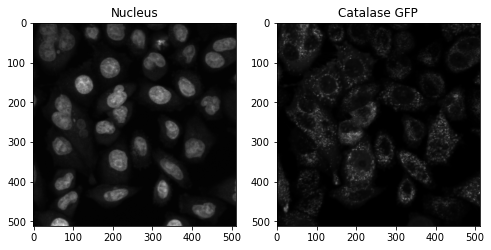

In [2]:
from skimage import io
image_pex = io.imread(os.path.join(r'F:\Gil\AIPS_platforms\AIPyS\data','catGFP.tif'))
fig, ax = plt.subplots(1, 2, figsize=(8, 8)) 
ax[0].imshow(image_pex[1,:,:], cmap=plt.cm.gray) 
ax[0].title.set_text('Nucleus') 
ax[1].imshow(image_pex[0,:,:], cmap=plt.cm.gray) 
ax[1].title.set_text('Catalase GFP') 

Set AIPyS object for preforming segmentation of the nucleus (seed),
```python
AIPS_object = ai.Segmentation(Image_name= 'catGFP.tif', path = 'data', ch_ = 1, rmv_object_nuc = 0.12,block_size = 59, offset=-4, clean = 3)
seed = AIPS_object.seedSegmentation()
nmask2 = seed['nmask2'] #Local threshold map - seed
sort_mask = seed['sort_mask'] #RGB map - seed
```
Then object is used for segmenting based on the nucleus as a seed. 
where the seed  segmentation parametrs are pluged in.  
Calculate a threshold mask image by using a weighted mean (block_size) of the local neighborhood of each pixel, minus a offset.

```python
fig, ax = plt.subplots(1, 2, figsize=(8, 8)) 
ax[0].imshow(nmask2, cmap=plt.cm.gray) 
ax[0].title.set_text('Local threshold map - seed') 
ax[1].imshow(sort_mask, cmap=plt.cm.rainbow) 
ax[1].title.set_text('RGB map - seed') 
```


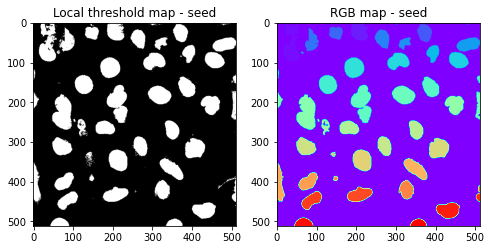

In [3]:
input_str ='catGFP.tif'
UPLOAD_DIRECTORY = r'F:\Gil\AIPS_platforms\AIPyS\data'
AIPS_object = ai.Segmentation(Image_name=input_str, path=UPLOAD_DIRECTORY, ch_=1, rmv_object_nuc=0.1,block_size=89, offset=-0.5, clean = 3)
seed = AIPS_object.seedSegmentation()
nmask2 = seed['nmask2']
sort_mask = seed['sort_mask']
table = seed['table']
fig, ax = plt.subplots(1, 2, figsize=(8, 8)) 
ax[0].imshow(nmask2, cmap=plt.cm.gray) 
ax[0].title.set_text('Local threshold map - seed') 
ax[1].imshow(sort_mask, cmap=plt.cm.rainbow) 
ax[1].title.set_text('RGB map - seed') 

Target channel (Catalase-GFP) was used to identify cell borders and edges for segmentation. High-pass filtering, local thresholding, and global thresholding were then used to create global and local masks.


```python
target = AIPS_object.cytosolSegmentation(ch2_=0, block_size_cyto=3, offset_cyto=-5, global_ther= 0.51, rmv_object_cyto=0.99, rmv_object_cyto_small=0.25)
combine = target['combine']
cseg_mask = target['cseg_mask']
mask_unfiltered = target['mask_unfiltered']
```

For generating a Contour mask we used the ```python Compsite_display``` module.

```python
maskContour = afd.Compsite_display(input_image = image_pex[0,:,:], mask_roi = cseg_mask, channel= 0).draw_ROI_contour()
fig, ax = plt.subplots(2, 2, figsize=(6, 6)) 
ax[0,0].imshow(image_pex[0,:,:], cmap=plt.cm.gray) 
ax[0,0].title.set_text('Catalase GFP') 
ax[0,1].imshow(combine, cmap=plt.cm.rainbow) 
ax[0,1].title.set_text('Local threshold map - seed')
ax[1,0].imshow(mask_unfiltered, cmap=plt.cm.rainbow) 
ax[1,0].title.set_text('Mask - Target')
ax[1,1].imshow(maskContour, cmap=plt.cm.rainbow) 
ax[1,1].title.set_text('Mask - Target (filterd)')
```


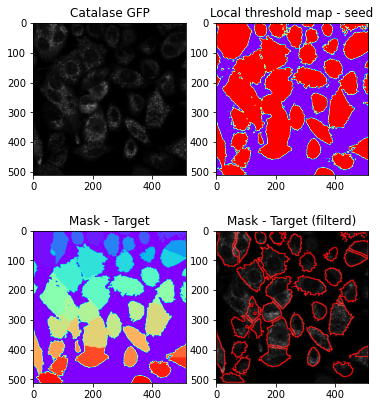

In [10]:
target = AIPS_object.cytosolSegmentation(ch2_=0, block_size_cyto=3, offset_cyto=-5, global_ther= 0.51, rmv_object_cyto=0.99, rmv_object_cyto_small=0.25)
combine = target['combine']
cseg_mask = target['cseg_mask']
mask_unfiltered = target['mask_unfiltered']
maskContour = afd.Compsite_display(input_image = image_pex[0,:,:], mask_roi = cseg_mask, channel= 0).draw_ROI_contour()
fig, ax = plt.subplots(2, 2, figsize=(6, 6)) 
fig.set_visible(True)
fig.set_figheight(7)
ax[0,0].imshow(image_pex[0,:,:], cmap=plt.cm.gray) 
ax[0,0].title.set_text('Catalase GFP') 
ax[0,1].imshow(combine, cmap=plt.cm.rainbow) 
ax[0,1].title.set_text('Local threshold map - seed')
ax[1,0].imshow(mask_unfiltered, cmap=plt.cm.rainbow) 
ax[1,0].title.set_text('Mask - Target')
ax[1,1].imshow(maskContour, cmap=plt.cm.rainbow) 
ax[1,1].title.set_text('Mask - Target (filterd)')